# Reporte de práctica 10: Clasificación de datos con sklearn

Para esta práctica solamente trabajamos con los datos del año 2017 para clasificar la categoría a la que pertenecen los cortos tomando como base la edad y sexo del concursante y el género del corto. 
Utilizaremos los [clasificadores de scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) y la distribución de los datos que vamos a usar serán 60% para entrenar y 40% para validar. 

## Objetivos 

* Utiliza por lo menos tres distintos métodos de clasificación 
* Por lo menos una división de interés en tus datos

## Preparación de los datos

Primero tomamos los archivos originales y los procesamos fuera de la nube, producto de esta limpieza se generó el archivo "clasificacion2017.csv"

Para poder trabajar importaremos la librería necesaria y cargaremos el documento .csv

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from numpy import isnan, nan
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

df = pd.read_csv("https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/old/clasificacion2017.csv")

df = df.dropna()
print(len(df))

649


## Categorización de los campos

Como tenemos campos con cadenas de caracteres utilizaremos la Categorización por defecto de pandas, y generaremos una columna con la etiqueta que utilizaremos para la clasificación.

In [8]:
gen = pd.Categorical(df.Genero)
df.Genero = gen.codes

pai = pd.Categorical(df.Pais)
df.Pais = pai.codes

sex = pd.Categorical(df.Sexo) 
df.Sexo = pai.codes

#cat = pd.Categorical(df.Categoria) 
#df['CategoriaCat'] = cat.codes


df['etiquetas1'] = [1 if df['Categoria'][i] == 'Aficionado' else 0 for i in df['Categoria'].keys()]# Clasificar Categorias
df['etiquetas2'] = [1 if df['Categoria'][i] == 'Juvenil' else 0 for i in df['Categoria'].keys()]# Clasificar Categorias
df['etiquetas3'] = [1 if df['Categoria'][i] == 'Profesional' else 0 for i in df['Categoria'].keys()]# Clasificar Categorias
df['etiquetas4'] = [1 if df['Categoria'][i] == 'SmarTIC' else 0 for i in df['Categoria'].keys()]# Clasificar Categorias

#df['etiquetas'] = df.CategoriaCat
print(df.etiquetas1.value_counts())
print(df.etiquetas2.value_counts())
print(df.etiquetas3.value_counts())
print(df.etiquetas4.value_counts())

1    362
0    287
Name: etiquetas1, dtype: int64
0    521
1    128
Name: etiquetas2, dtype: int64
0    573
1     76
Name: etiquetas3, dtype: int64
0    566
1     83
Name: etiquetas4, dtype: int64


## Procedimiento

Se preparan las variables que necesitamos para preparar el clasificador y además aplicamos un PCA. Se separan los datos y se pone el 60% para entrenamiento del clasificador y el 40% para pruebas. Se busca clasificar la categoría de participación del filme, donde cada categoría es clasificada individualmente, y no en grupo, para buscar particularidades en los datos.

Después se muestran las tablas de confusión para entender mejor porque les otorgaron esas precisiones a los diferentes métodos de clasificación.

-------------------------Iniciando Proceso con Etiqueta 1---------------------


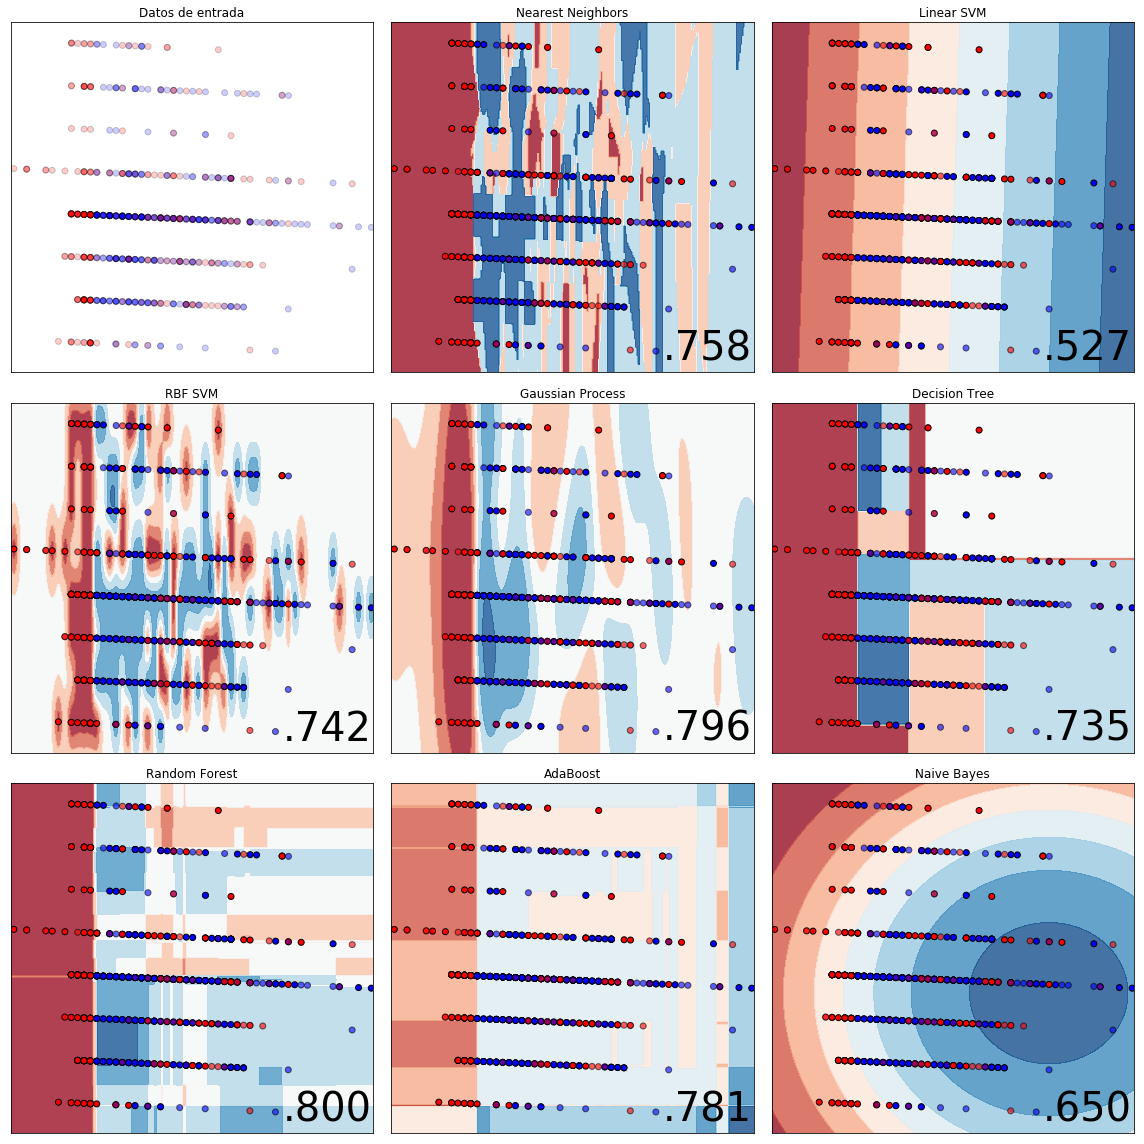

Ahora calcularemos las matrices de confusión para la etiqueta1.
('Nearest Neighbors', 0.7576923076923077)
             precision    recall  f1-score   support

          0       0.68      0.66      0.67        96
          1       0.80      0.82      0.81       164

avg / total       0.76      0.76      0.76       260

[[ 63  33]
 [ 30 134]]
------------------------------------------------------------
('Linear SVM', 0.5269230769230769)
             precision    recall  f1-score   support

          0       0.41      0.61      0.49        96
          1       0.68      0.48      0.56       164

avg / total       0.58      0.53      0.53       260

[[59 37]
 [86 78]]
------------------------------------------------------------
('RBF SVM', 0.7423076923076923)
             precision    recall  f1-score   support

          0       0.67      0.60      0.63        96
          1       0.78      0.82      0.80       164

avg / total       0.74      0.74      0.74       260

[[ 58  38]
 [ 29 1

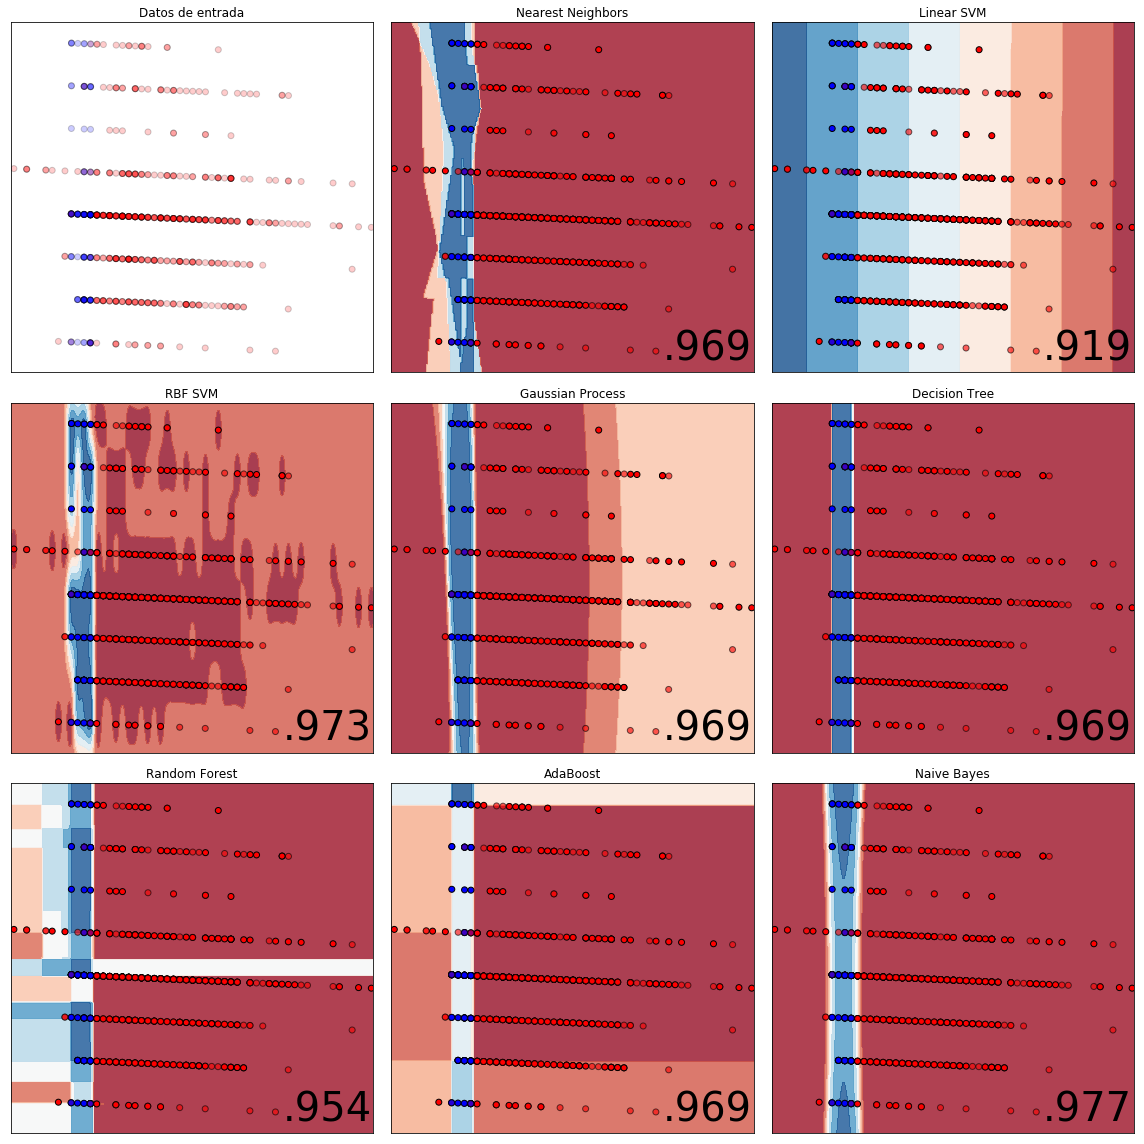

Ahora calcularemos las matrices de confusión para la etiqueta2.
('Nearest Neighbors', 0.9692307692307692)
             precision    recall  f1-score   support

          0       1.00      0.96      0.98       223
          1       0.82      1.00      0.90        37

avg / total       0.97      0.97      0.97       260

[[215   8]
 [  0  37]]
------------------------------------------------------------
('Linear SVM', 0.9192307692307692)
             precision    recall  f1-score   support

          0       1.00      0.91      0.95       223
          1       0.64      1.00      0.78        37

avg / total       0.95      0.92      0.93       260

[[202  21]
 [  0  37]]
------------------------------------------------------------
('RBF SVM', 0.9730769230769231)
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       223
          1       0.88      0.95      0.91        37

avg / total       0.97      0.97      0.97       260

[[218   5]
 [ 

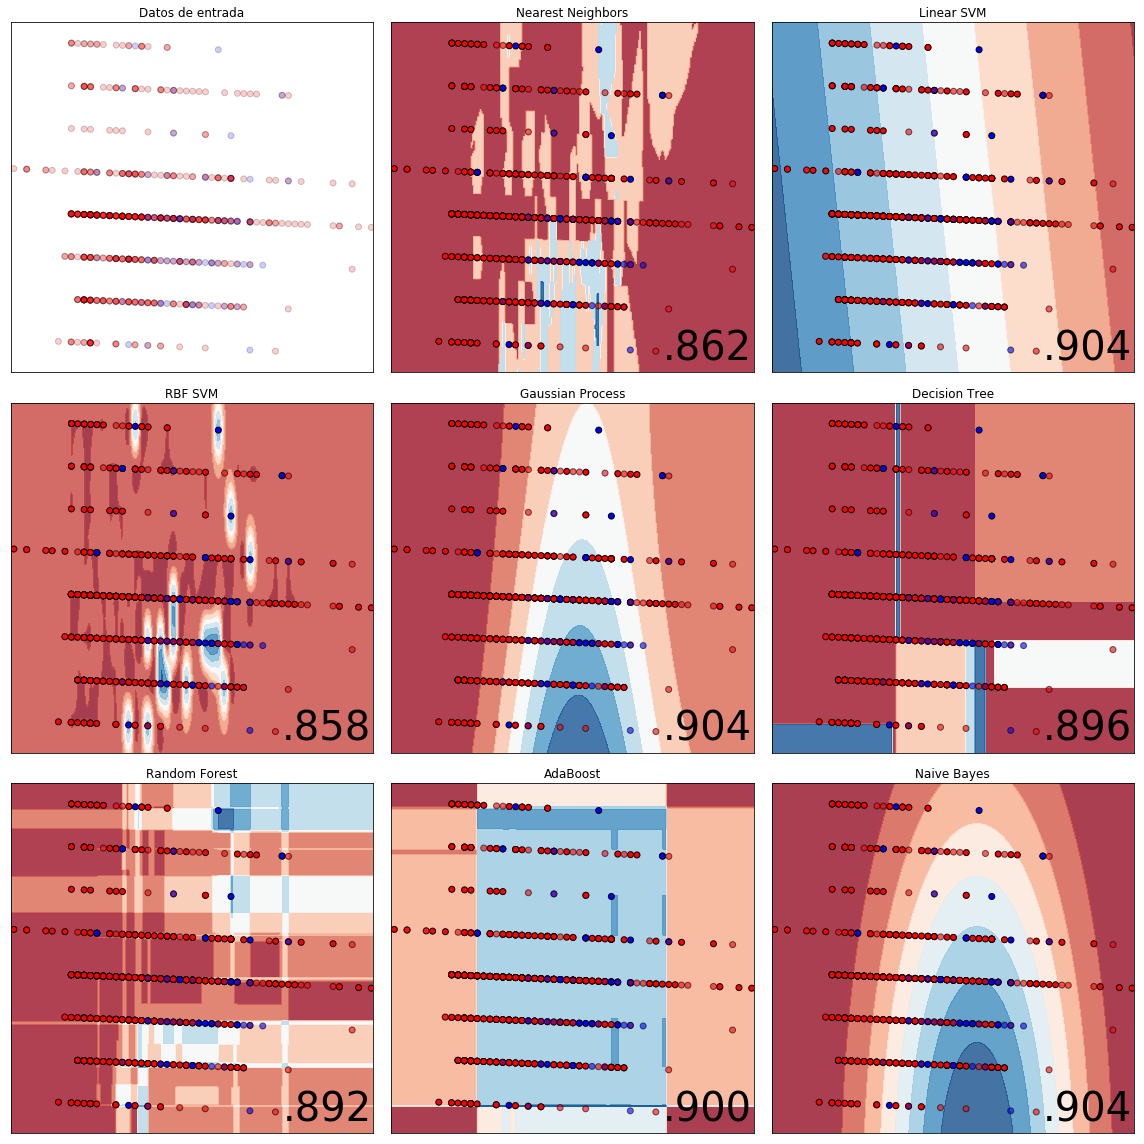

Ahora calcularemos las matrices de confusión para la etiqueta3.
('Nearest Neighbors', 0.8615384615384616)
             precision    recall  f1-score   support

          0       0.91      0.94      0.92       235
          1       0.21      0.16      0.18        25

avg / total       0.85      0.86      0.85       260

[[220  15]
 [ 21   4]]
------------------------------------------------------------
('Linear SVM', 0.9038461538461539)
             precision    recall  f1-score   support

          0       0.90      1.00      0.95       235
          1       0.00      0.00      0.00        25

avg / total       0.82      0.90      0.86       260

[[235   0]
 [ 25   0]]
------------------------------------------------------------
('RBF SVM', 0.8576923076923076)
             precision    recall  f1-score   support

          0       0.90      0.94      0.92       235
          1       0.07      0.04      0.05        25

avg / total       0.82      0.86      0.84       260

[[222  13]
 [ 

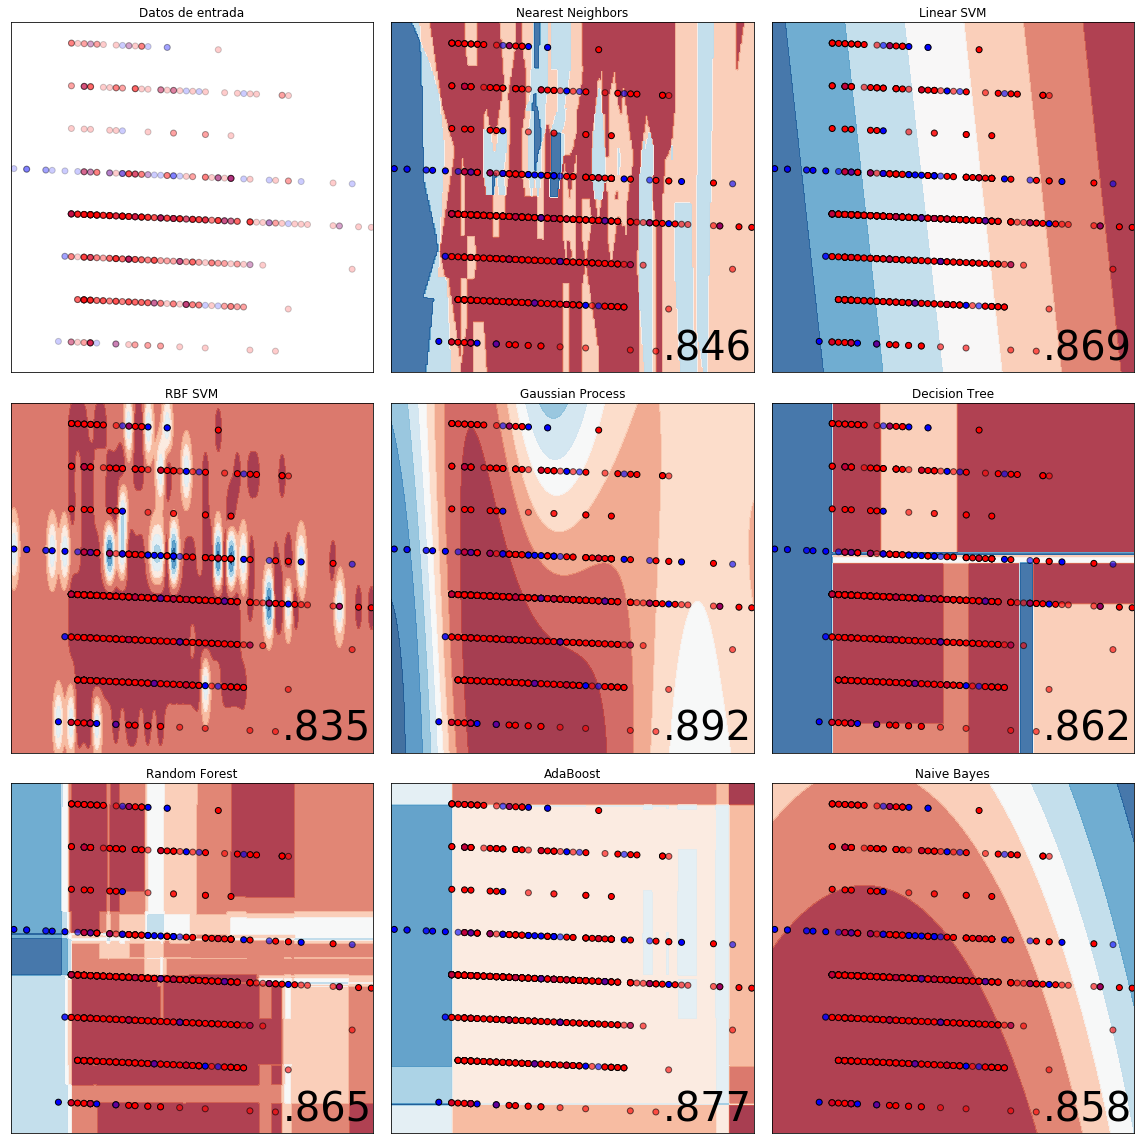

Ahora calcularemos las matrices de confusión para la etiqueta4.
('Nearest Neighbors', 0.8461538461538461)
             precision    recall  f1-score   support

          0       0.89      0.94      0.91       226
          1       0.36      0.24      0.29        34

avg / total       0.82      0.85      0.83       260

[[212  14]
 [ 26   8]]
------------------------------------------------------------
('Linear SVM', 0.8692307692307693)
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       226
          1       0.00      0.00      0.00        34

avg / total       0.76      0.87      0.81       260

[[226   0]
 [ 34   0]]
------------------------------------------------------------
('RBF SVM', 0.8346153846153846)
             precision    recall  f1-score   support

          0       0.87      0.95      0.91       226
          1       0.20      0.09      0.12        34

avg / total       0.79      0.83      0.81       260

[[214  12]
 [ 

In [12]:
for indexEtiqueta in range(1,5):
    print("-------------------------Iniciando Proceso con Etiqueta {:d}---------------------".format(indexEtiqueta))
    y = df['etiquetas'+str(indexEtiqueta)]

    xVars = ['Edad', 'Sexo', 'Genero'] 
    x = df.loc[:, xVars].values
    #x = StandardScaler().fit_transform(x)
    pca = PCA(n_components = 2) # pedimos uno bidimensional
    X = pca.fit_transform(x)

    from math import ceil, sqrt
    from numpy import isnan, nan, arange, meshgrid, c_
    import matplotlib.pyplot as plt
    h=0.2
    # código de https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
             "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
    classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
        SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
        DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
        AdaBoostClassifier(), GaussianNB()]
    k = int(ceil(sqrt(len(classifiers) + 1)))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # división
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, 0.02))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.rcParams["figure.figsize"] = [16, 16]
    figure = plt.figure()
    ax = plt.subplot(k, k, 1)
    ax.set_title("Datos de entrada")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.2, edgecolors='k') # entrenamiento
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors='k') # validación
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i = 2
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(k, k, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'), size=40, horizontalalignment='right')
        i += 1
    plt.tight_layout()
    plt.show()

    print("Ahora calcularemos las matrices de confusión para la etiqueta{:d}.".format(indexEtiqueta))

    # código de https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
             "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
    classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
        SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
        DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
        AdaBoostClassifier(), GaussianNB()]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # la misma división

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        print(name, clf.score(X_test, y_test))
        expected, predicted = y_test, clf.predict(X_test)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))
        print('-' * 60)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

## Conclusión

Después de probar los diferentes métodos y buscar clasificar todas las categorías de participación individualmente, se obtuvieron los siguientes resultados.

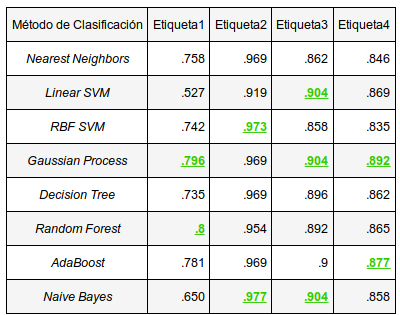

In [1]:
from IPython.display import Image 
Image(filename='14.png')

Se puede concluir que con los datos de edad y sexo del participante y el género del Filme, se puede precisar si la participación del concursante es en la categoría Juvenil. En cambio, para identificar las otras categorías, los datos proporcionados otorgaron al clasificador una precisión a lo más del 79.6% para las demás categorías.


--05 de junio 2019-- Luis Angel Gutiérrez Rodríguez 1484412